In [4]:
#IMPORTATION 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import xlwings as xw

In [5]:
"""1. Transformer le fichier pluvio_senegal.xlsx en DataFrame et afficher les noms des feuilles."""

P = pd.ExcelFile("pluvio_senegal.xlsx")

In [6]:
"""2. Charger et afficher une feuille de votre choix."""

F = P.parse("Pluvio_fatick")
F

,Stations,Annees,Janv,Fevr,Mars,Avr,Mai,Juin,Juil,Aout,Sept,Oct,Nov,Dec
0,Fatick,1950,0.0,0.0,0.0,0,2.0,48.4,201.9,533.9,359.0,73.8,1.2,0.0
1,Fatick,1951,0.0,0.0,0.0,0,2.0,11.7,104.1,308.7,343.1,244.1,1.3,0.0
2,Fatick,1952,0.0,0.0,0.0,0,20.2,33.2,129.3,256.6,305.9,102.6,0.0,0.0
3,Fatick,1953,0.0,0.0,0.0,0,0.0,8.2,251.8,204.6,284.0,110.2,0.0,0.0
4,Fatick,1954,0.0,18.4,0.0,0,0.0,93.1,131.5,269.1,97.5,19.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Fatick,2013,0.0,0.0,0.0,0,NaN,58.7,108.6,396.9,134.0,65.0,1.5,0.0
64,Fatick,2014,0.0,0.0,0.0,0,0.0,NaN,12.6,203.6,138.9,61.8,0.0,0.0
65,Fatick,2015,0.0,0.0,0.0,0,0.0,0.0,156.0,252.8,260.2,29.2,0.0,0.0
66,Fatick,2016,0.0,0.0,0.0,0,0.0,NaN,264.2,85.3,228.3,15.2,0.0,0.0


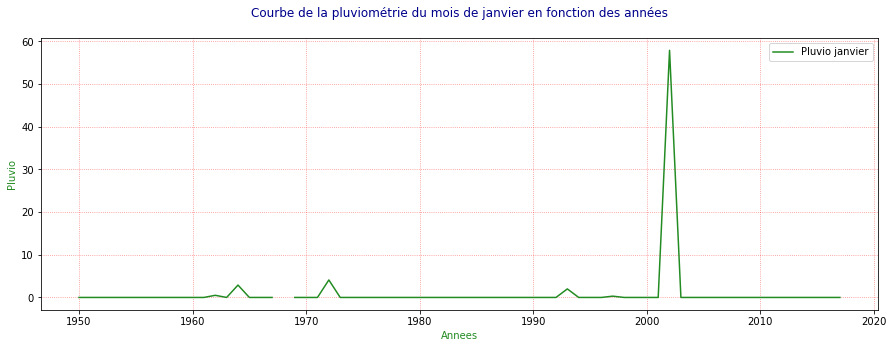

In [7]:
"""3.Tracer la courbe de la pluviométrie du mois de janvier en fonction des années."""

fig1 = plt.figure(figsize = (15,5))
plt.title('Courbe de la pluviométrie du mois de janvier en fonction des années\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Pluvio',color='forestgreen')
plt.plot(F["Annees"], F["Janv"], label = 'Pluvio janvier', color='forestgreen')
plt.grid(alpha = .5, linestyle =':', color = 'red')
plt.legend()
plt.show()

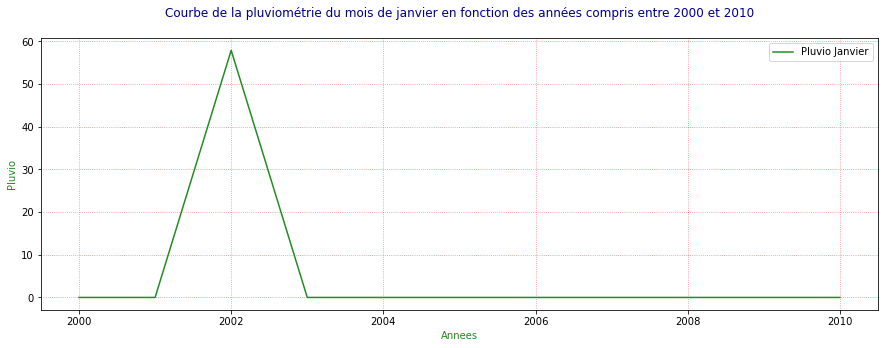

In [8]:
E=np.where((F['Annees'] >= 2000) & (F['Annees'] <= 2010))

fig2 = plt.figure(figsize = (15,5))
plt.title('Courbe de la pluviométrie du mois de janvier en fonction des années compris entre 2000 et 2010\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Pluvio',color='forestgreen')
plt.plot(F.loc[E]["Annees"], F.loc[E]["Janv"], label = 'Pluvio Janvier',color='forestgreen')
plt.grid(alpha = .5, linestyle =':', color = 'red')
plt.legend()
plt.show()

In [9]:
"""5.Ecrire un programme qui permet de récupérer l’année où la courbe est maximale."""

M=np.where(F['Janv'] == F.loc[E]["Janv"].max())
maxi=F.loc[M]['Annees'].tolist()
print("L'annee où la courbe est maximale est",maxi[0])

L'annee où la courbe est maximale est 2002


In [10]:
"""6. Ecrire un programme qui calcule la moyenne de la pluviométrie pour les intervalles
d’années suivants :
• [1950, 1969] ;
• [1970, 1999] ;
• [2000, 2017]."""

I=np.where(F['Annees'] <= 1969)
J=np.where((F['Annees'] >= 1970) & (F['Annees'] <= 1999))
K=np.where(F['Annees'] >= 2000)
Moys1=F.loc[I].describe().iloc[1,1:]
Moys2=F.loc[J].describe().iloc[1,1:]
Moys3=F.loc[K].describe().iloc[1,1:]

print("La moyenne pour chaque intervalle : \n• [1950, 1969] -->\n",Moys1,
      "\n• [1970, 1999] -->\n",Moys2,
      "\n• [2000, 2017] -->\n",Moys3)


La moyenne pour chaque intervalle : 
• [1950, 1969] -->
 Janv      0.178947
Fevr      1.357895
Mars      0.000000
Avr       0.000000
Mai       1.940000
Juin     44.945000
Juil    147.845000
Aout    286.430000
Sept    241.180000
Oct      76.115000
Nov       0.275000
Dec       1.090000
Name: mean, dtype: float64 
• [1970, 1999] -->
 Janv      0.213333
Fevr      0.970000
Mars      0.010000
Avr       0.000000
Mai       0.440000
Juin     28.580000
Juil    100.206667
Aout    200.973333
Sept    146.736667
Oct      27.496667
Nov       1.053333
Dec       1.603333
Name: mean, dtype: float64 
• [2000, 2017] -->
 Janv      3.216667
Fevr      0.183333
Mars      0.227778
Avr       0.000000
Mai       0.475000
Juin     31.912500
Juil    129.494444
Aout    243.244444
Sept    183.444444
Oct      48.561111
Nov       0.500000
Dec       0.000000
Name: mean, dtype: float64


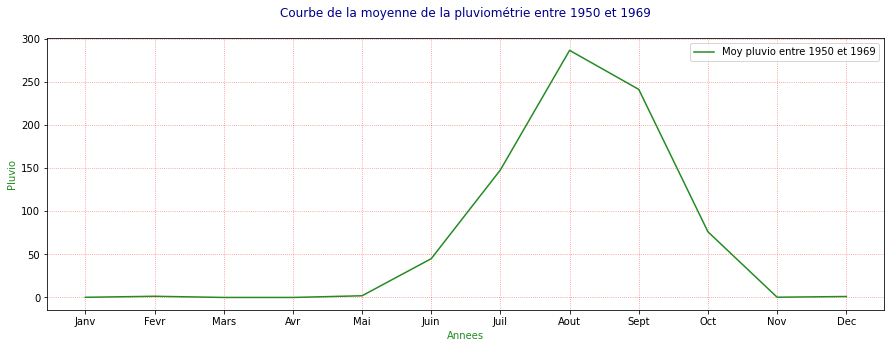

In [11]:
"""7. Tracer la moyenne de la pluviométrie entre 1950 et 1969."""

fig3 = plt.figure(figsize = (15,5))
plt.title('Courbe de la moyenne de la pluviométrie entre 1950 et 1969\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Pluvio',color='forestgreen')
plt.plot(Moys1.index, Moys1.values, label="Moy pluvio entre 1950 et 1969",color='forestgreen')
plt.grid(alpha = .5, linestyle =':',color='red')
plt.legend()
plt.show()


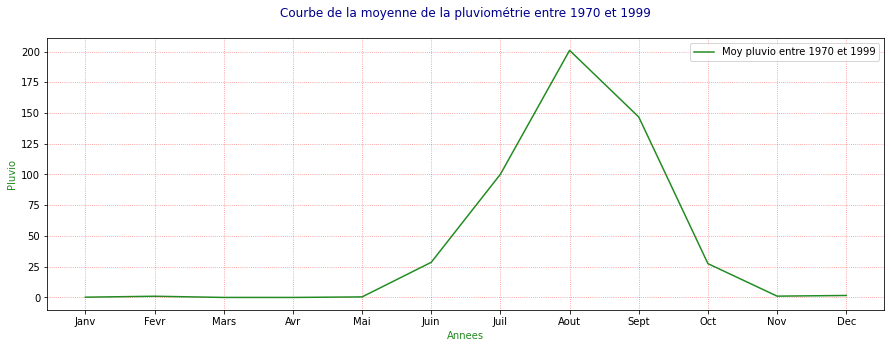

In [12]:
"""8. Tracer la moyenne de la pluviométrie entre 1970 et 1999."""

fig4 = plt.figure(figsize = (15,5))
plt.title('Courbe de la moyenne de la pluviométrie entre 1970 et 1999\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Pluvio',color='forestgreen')
plt.plot(Moys2.index, Moys2.values, label="Moy pluvio entre 1970 et 1999",color='forestgreen')
plt.grid(alpha = .5, linestyle =':',color='red')
plt.legend()
plt.show()

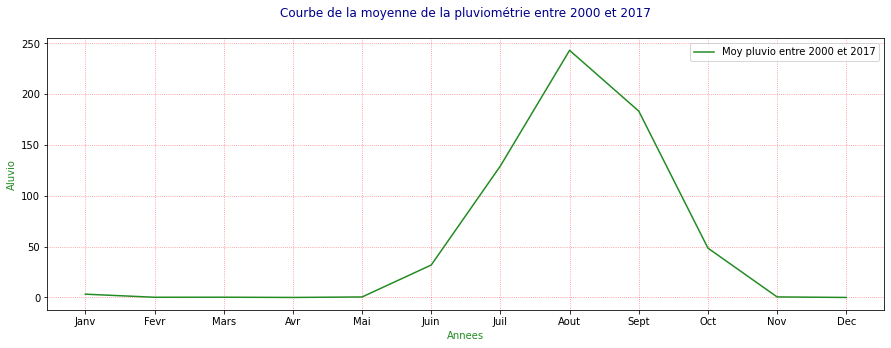

In [13]:
"""9. Tracer la moyenne de la pluviométrie entre 2000 et 2017."""

fig5 = plt.figure(figsize = (15,5))
plt.title('Courbe de la moyenne de la pluviométrie entre 2000 et 2017\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Aluvio',color='forestgreen')
plt.plot(Moys3.index, Moys3.values, label="Moy pluvio entre 2000 et 2017",color='forestgreen')
plt.grid(alpha = .5, linestyle =':',color='red')
plt.legend()
plt.show()

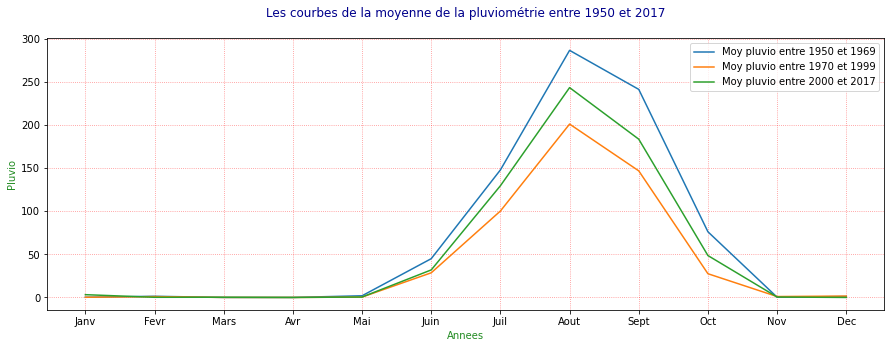

In [14]:
"""Regroupement des courbes"""

fig6 = plt.figure(figsize = (15,5))
plt.title('Les courbes de la moyenne de la pluviométrie entre 1950 et 2017\n',color='darkblue')
plt.xlabel('Annees',color='forestgreen')
plt.ylabel('Pluvio',color='forestgreen')
plt.plot(Moys1.index, Moys1.values, label="Moy pluvio entre 1950 et 1969")
plt.plot(Moys2.index, Moys2.values, label="Moy pluvio entre 1970 et 1999")
plt.plot(Moys3.index, Moys3.values, label="Moy pluvio entre 2000 et 2017")
plt.grid(alpha = .5, linestyle =':',color='red')
plt.legend()
plt.show()

In [15]:
"""10. Dans cette partie, on demandera d’écrire un programme qui permet de :
• créer et remplir un vecteur représentant la somme pluviométrique annuelle ;
• déterminer la moyenne du vecteur obtenu ;
• calculer la différence entre le vecteur et sa moyenne."""

X = F.iloc[:,2:]
S = np.sum(X, axis = 1)
M = np.nanmean(S)
D = S - M
print("\nLa moyenne est de",M,
     "\nLa difference voulue est \n",D)



La moyenne est de 628.7058823389409 
La difference voulue est 
 0     591.494118
1     386.294118
2     219.094118
3     230.094118
4       0.594118
         ...    
63    135.994118
64   -211.805882
65     69.494118
66    -35.705882
67    -79.605882
Length: 68, dtype: float64


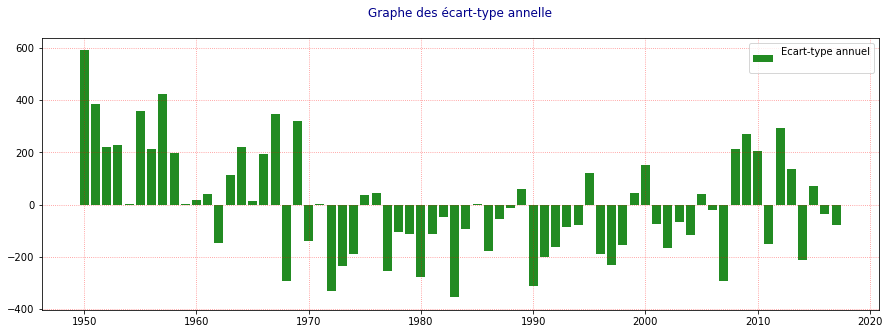

In [16]:
"""11. Tracer la courbe de la différence obtenue à la question précédente en fonction des années."""

fig7 = plt.figure(figsize = (15,5))
plt.title('Graphe des écart-type annelle\n',color='darkblue')
plt.bar(F.Annees, D, label = 'Ecart-type annuel\n',color='forestgreen')
plt.legend()
plt.grid(alpha = .5, linestyle =':',color='red')
plt.show()


• [1950, 1969]
La moyenne est de 801.28 
La difference voulue est 
 [418.91999999999985, 213.7199999999999, 46.520000000000095, 57.51999999999998, -171.9799999999999, 187.0200000000001, 41.120000000000005, 249.72000000000003, 26.020000000000095, -171.17999999999995, -156.67999999999995, -133.07999999999993, -319.08, -60.57999999999993, 49.51999999999998, -158.17999999999995, 22.519999999999982, 175.41999999999996, -465.98, 148.72000000000003]


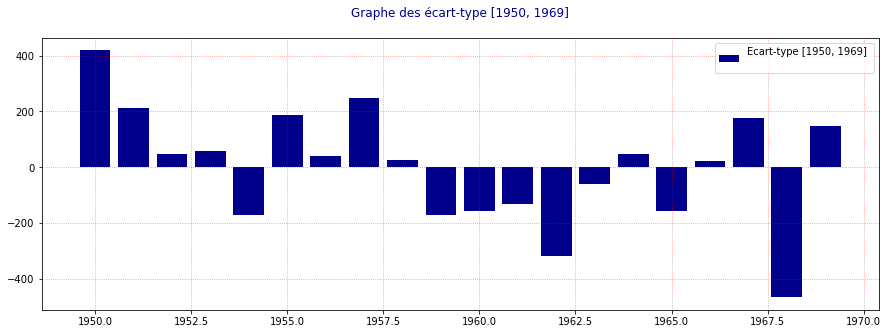

In [17]:
"""12. Reprendre les question 10 et 11 pour les intervalles d’années suivants :
• [1950, 1969] ;
• [1970, 1999] ;
• [2000, 2017]."""

I=np.where(F['Annees'] <= 1969)
J=np.where((F['Annees'] >= 1970) & (F['Annees'] <= 1999))
K=np.where(F['Annees'] >= 2000)
Moy1=F.loc[I].iloc[:,2:]
Moy2=F.loc[J].iloc[:,2:]
Moy3=F.loc[K].iloc[:,2:]

S1 = np.sum(Moy1 , axis = 1)
M1 = np.nanmean(S1)
D1 = S1 - M1
print("\n• [1950, 1969]\nLa moyenne est de",M1,
     "\nLa difference voulue est \n",D1.tolist())
fig8 = plt.figure(figsize = (15,5))
plt.title('Graphe des écart-type [1950, 1969]\n',color='darkblue')
plt.bar(F.loc[I].Annees, D1, label = 'Ecart-type [1950, 1969] \n',color='darkblue')
plt.grid(alpha = .5, linestyle =':',color='red')
plt.legend()
plt.show()



• [1970, 1999]
La moyenne est de 508.28333330159984 
La difference voulue est 
 [-18.08333330159985, 121.61666669840014, -210.18333330159982, -113.88333330159986, -69.68333330159976, 157.51666669840023, 164.31666669840018, -135.08333330159985, 14.516666698400229, 9.416666698400093, -158.8833333226474, 5.9166666604022, 70.91666661290441, -235.78333329042414, 26.5166666805182, 124.21666657360225, -56.483333326931245, 66.51666652033038, 107.11666672150301, 180.5166665762111, -193.58333331538347, -79.58333328080789, -41.58333327254252, 35.6166665907395, 40.51666658738594, 239.61666665668855, -69.28333329496417, -111.4833333426476, -35.68333338951709, 164.41666667157796]


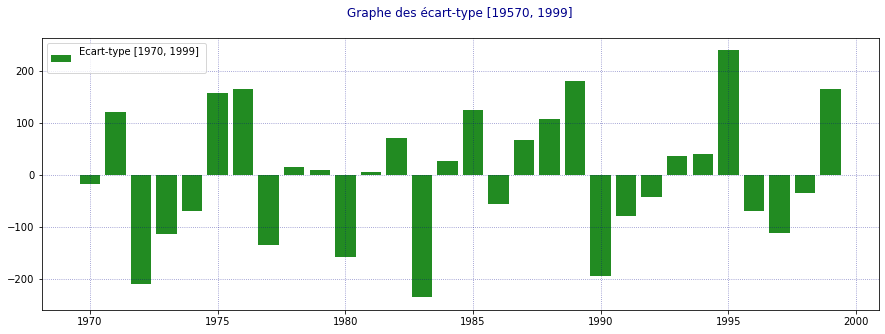

In [18]:
"""• [1970, 1999]"""
S2 = np.sum(Moy2 , axis = 1)
M2 = np.nanmean(S2)
D2 = S2 - M2
print("\n• [1970, 1999]\nLa moyenne est de",M2,
     "\nLa difference voulue est \n",D2.tolist())
fig9 = plt.figure(figsize = (15,5))
plt.title('Graphe des écart-type [19570, 1999]\n',color='darkblue')
plt.bar(F.loc[J].Annees, D2, label = 'Ecart-type [1970, 1999] \n',color='forestgreen')
plt.grid(alpha = .5, linestyle =':',color='darkblue')
plt.legend()
plt.show()



• [2000, 2017]
La moyenne est de 637.661111111111 
La difference voulue est 
 [142.23888888888894, -81.76111111111106, -174.96111111111105, -77.16111111111115, -126.961111111111, 31.138888888888914, -29.361111111110972, -301.061111111111, 203.33888888888896, 260.33888888888896, 197.038888888889, -161.26111111111106, 284.83888888888896, 127.038888888889, -220.761111111111, 60.538888888889005, -44.66111111111104, -88.56111111111113]


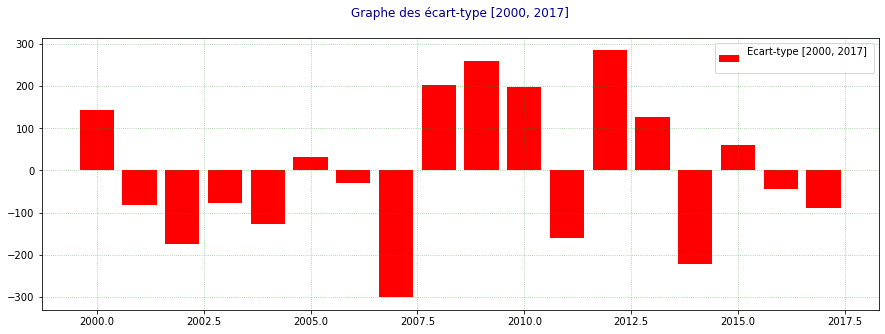

In [19]:
"""•[2000, 2017]"""
S3 = np.sum(Moy3 , axis = 1)
M3 = np.nanmean(S3)
D3 = S3 - M3
print("\n• [2000, 2017]\nLa moyenne est de",M3,
     "\nLa difference voulue est \n",D3.tolist())
fig10 = plt.figure(figsize = (15,5))
plt.title('Graphe des écart-type [2000, 2017]\n',color='darkblue')
plt.bar(F.loc[K].Annees, D3, label = 'Ecart-type [2000, 2017] \n',color='red')
plt.grid(alpha = .5, linestyle =':',color='forestgreen')
plt.legend()
plt.show()


In [20]:
"""13. Écrire un programme qui insère dans le fichier pluvio_senegal.xlsx les courbes des questions
précédentes avec des feuilles différentes."""

"""Pluvio janvier"""
PF = xw.Book("pluvio_senegal.xlsx")
F1 = PF.sheets("Pluvio_fatick")
ax6 = fig6.get_figure()
F1.pictures.add(ax6, name = "Les courbes de la moyenne de la pluviométrie entre 1950 et 2017", update = True)
ax7 = fig7.get_figure()
F1.pictures.add(ax7, name = "Graphe des écart-type annelle", update = True)
ax8 = fig8.get_figure()
F1.pictures.add(ax8, name = "Graphe des écart-type [1950, 1969]", update = True)
ax9 = fig9.get_figure()
F1.pictures.add(ax9, name = "Graphe des écart-type [19570, 1999]", update = True)
ax10 = fig10.get_figure()
F1.pictures.add(ax10, name = "Graphe des écart-type [2000, 2017]", update = True)
plt.show()
